In [1]:
import os
from collections import Counter
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

### 1. Re-identification attack

 - Load the .csv file in a DataFrame *adult*. Besides the usual adult dataset it also contains (made up) names, dates of birth and zip codes.
 - Create a new DataFrame *pii* containing only the columns 'Name', 'Birth Date', 'Zipcode'. Drop the 'Name' column from the *adult* dataset. This process is called **de-identification**.
 - A **re-identification** attack consists of joining ([pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)) additional information with a de-identified dataset. 
      - How many people can be re-identified by using only the 'Birth Date' column? 
      - How many by using 'Zipcode'? 
      - What if both 'Birth Date' and 'Zipcode' are used?

In [2]:
with open('./adults_w_names.csv') as f_in :
    adult = pd.read_csv(f_in)
    
adult = adult.drop(['Unnamed: 0'], axis=1)
#print(adult[0:5])
#adult.describe()

pii = adult[['Name', 'Birth Date', 'Zipcode']]

adult = adult.drop(['Name'], axis=1)

In [6]:
print(len(pii['Birth Date'].unique()))

rei_birth = pd.merge(adult, pii['Birth Date'])
rei_zip = pd.merge(adult, pii['Zipcode'])
rei_both = pd.merge(adult, pii[['Birth Date', 'Zipcode']])
print(len(rei_birth), len(rei_zip), len(rei_both), len(adult))

15220
94237 57725 32561 32561


### 2. Differentially Private Queries

Releasing aggregate statistics of a database can also leak information. The [Laplace mechanism](https://en.wikipedia.org/wiki/Additive_noise_mechanisms) is one method to make queries $f:D\rightarrow R$ differentially private. It adds suitably scaled noise from a Laplace distribution to the data. To find the correct noise scale for achieving $\epsilon$-DP, the global sensitivity of the function $f$, defined as 
$s = \arg\max |f(D_0)-f(D_1)|$ over all neighboring datasets $D_0, D_1$ is needed.

0. Laplace mechanism:
    - Given $\epsilon>0$ and global sensitivity $s$, implement the (scalar) Laplace mechanism
    - How can this be extended to vector valued functions?
1. Counting Query:
    - What is the global sensitivity of a query that counts the number of records satisfying a condition?
    - Implement an $\epsilon$-DP counting query
2. Sum Query:
    - What is the global sensitivity of a query that computes the sum of a quantity? (**Hint**: clipping)
    - Implement an $\epsilon$-differentially private mean function using the Laplace mechanism
3. Variance Query:
    - Use your results from 1. and 2. to implement an $\epsilon$-DP variance query

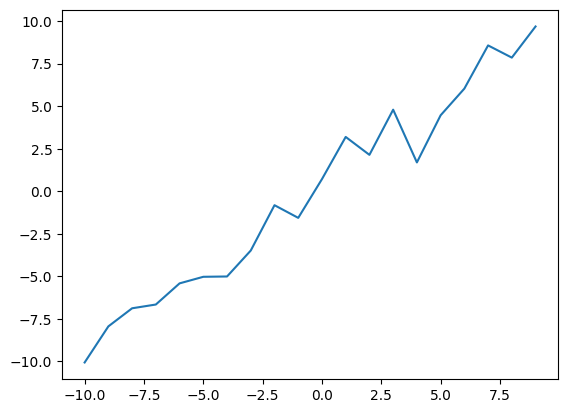

In [56]:
from numpy.random import default_rng

rng = default_rng()

def laplace (x, eps=0.1, s=1) :
    return x + rng.laplace(0, s/eps)

def laplace_gen (x, eps=1, s=1) :
    try : return [laplace(i, eps, s) for i in x]
    except TypeError : 
        print("Not an iterable")
        return laplace(x, eps=1, s=1)

x = range(-10,10)

plt.plot(x, laplace_gen(x))